In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
w1 = np.array([[1,6],[3,4],[3,8],[5,6]])
w2 = np.array([[3,0],[1,-2],[3,-4],[5,-2]])

In [19]:
train_x = np.concatenate((w1,w2),axis=0)
train_y = np.array([0,0,0,0,1,1,1,1])

train = pd.DataFrame(train_x,columns=['x1','x2'])
train['y'] = train_y
train

,x1,x2,y
0,1,6,0
1,3,4,0
2,3,8,0
3,5,6,0
4,3,0,1
5,1,-2,1
6,3,-4,1
7,5,-2,1


In [20]:
def covariance_matrix(train):
    dim = len(train.columns) - 1
    data = train.iloc[:, :dim]
    mean_vector = np.array(data.mean())
    centered_data = data - mean_vector
    cov_matrix = np.dot(centered_data.T, centered_data) / (len(train) - 1)
    return cov_matrix


def fit_Bayes_classifier(train):
    classes = train['y'].unique()
    dim = len(train.columns) - 1
    mean_vector = {}
    cov_matrix = {}
    inv_cov_matrix = {}
    det_cov_matrix = {}

    for c in classes:
        mean_vector[c] = np.array(train[train['y'] == c].iloc[:, :dim].mean())
        cov_matrix[c] = np.array(covariance_matrix(train[train['y'] == c]))
        inv_cov_matrix[c] = np.linalg.inv(cov_matrix[c])
        det_cov_matrix[c] = np.linalg.det(cov_matrix[c])

    return mean_vector, inv_cov_matrix, det_cov_matrix


def discriminant_function(train, test_vector, mean_vector, inv_cov_matrix, det_cov_matrix):
    classes = train['y'].unique()
    dim = len(train.columns) - 1
    bayes_prob = []

    for c in classes:
        apriori = len(train[train['y'] == c]) / len(train)
        test_vector = np.array(test_vector)
        prob = np.exp(-0.5 * np.dot(np.dot((test_vector - mean_vector[c]).T, inv_cov_matrix[c]), (test_vector - mean_vector[c]))) / (
                    np.power(2 * np.pi, dim / 2) * np.power(det_cov_matrix[c], 0.5))
        bayes_prob.append(prob * apriori)

    discriminant = max(bayes_prob)
    return discriminant, np.argmax(bayes_prob)

In [21]:
mean_vector, inv_cov_matrix, det_cov_matrix = fit_Bayes_classifier(train)

In [22]:
x_min, x_max = train.iloc[:, 0].min() - 1, train.iloc[:, 0].max() + 1
y_min, y_max = train.iloc[:, 1].min() - 1, train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

discriminant = []

for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        discriminant.append(discriminant_function(train,[xx[i][j],yy[i][j]], mean_vector, inv_cov_matrix, det_cov_matrix))

## Plotting

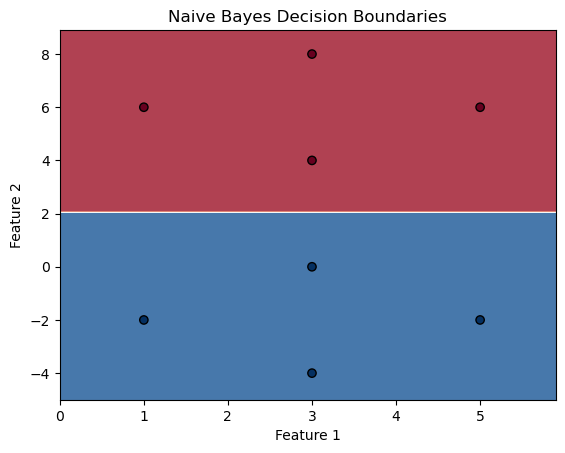

In [23]:
discriminant_values = []
classes_predicted = []

for i in range(len(discriminant)):
    discriminant_values.append(discriminant[i][0])
    classes_predicted.append(discriminant[i][1])

classes_predicted = np.array(classes_predicted).reshape(xx.shape)
plt.contourf(xx, yy, classes_predicted, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=train['y'], cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundaries')
plt.show()



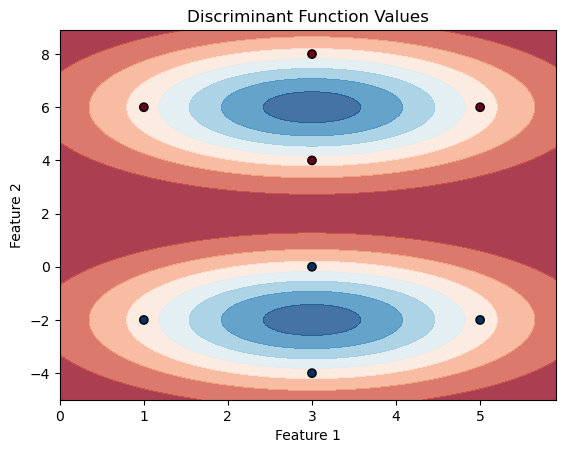

In [24]:
discriminant_values = np.array(discriminant_values).reshape(xx.shape)
plt.contourf(xx, yy, discriminant_values, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=train['y'], cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Discriminant Function Values')
plt.show()